In [6]:
!pip install matplotlib numpy netCDF4

In [5]:
import netCDF4

# Define the file paths for all your NetCDF files
file_paths = {
    'SSH': 'project_SSH_1992-2021.nc',
    'SST': 'project_SST_1992-2021.nc',
    'uSSW': 'project_uSSW_1992-2021.nc',
    'vSSW': 'project_vSSW_1992-2021.nc'
}

# Function to read and summarize the contents of a NetCDF file
def summarize_nc_file(file_path):
    # Open the NetCDF file
    dataset = netCDF4.Dataset(file_path, 'r')

    print(f"\n===== Reading {file_path} =====")

    # Print general information about the dataset
    print("\nDataset Information:")
    print(f"Dimensions: {dataset.dimensions}")
    print(f"Variables: {dataset.variables}")
    print(f"Global Attributes: {dataset.ncattrs()}")

    # List and print out basic details for each variable
    for var_name in dataset.variables:
        var = dataset.variables[var_name]
        print(f"\nVariable: {var_name}")
        print(f"  Shape: {var.shape}")
        print(f"  Dimensions: {var.dimensions}")
        print(f"  Data type: {var.datatype}")

        # Preview a small portion of the data
        data_preview = var[:5]  # Preview the first 5 elements for large datasets
        print(f"  Data Preview (first 5 entries): {data_preview}")

        # If the variable has attributes, print them
        if len(var.ncattrs()) > 0:
            print(f"  Attributes:")
            for attr_name in var.ncattrs():
                print(f"    {attr_name}: {getattr(var, attr_name)}")

    # Close the dataset after processing
    dataset.close()

# Loop through each file and summarize its contents
for var_name, file_path in file_paths.items():
    summarize_nc_file(file_path)



===== Reading project_SSH_1992-2021.nc =====

Dataset Information:
Dimensions: {'time': "<class 'netCDF4.Dimension'>": name = 'time', size = 360, 'lat': "<class 'netCDF4.Dimension'>": name = 'lat', size = 545, 'lon': "<class 'netCDF4.Dimension'>": name = 'lon', size = 720}
Variables: {'SSH': <class 'netCDF4.Variable'>
float32 SSH(time, lat, lon)
    units: m
    _FillValue: 9.96921e+36
    lonPivot: reordered via lonPivot [NCL]: pivotLon=180
unlimited dimensions: 
current shape = (360, 545, 720)
filling on, 'time': <class 'netCDF4.Variable'>
int32 time(time)
    units: YYYYMM
    long_name: time
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of -2147483647 used, 'lat': <class 'netCDF4.Variable'>
float32 lat(lat)
    axis: Y
    valid_max: 90.0
    valid_min: -90.0
    units: degree_north
    standard_name: latitude
unlimited dimensions: 
current shape = (545,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4.Variable'>


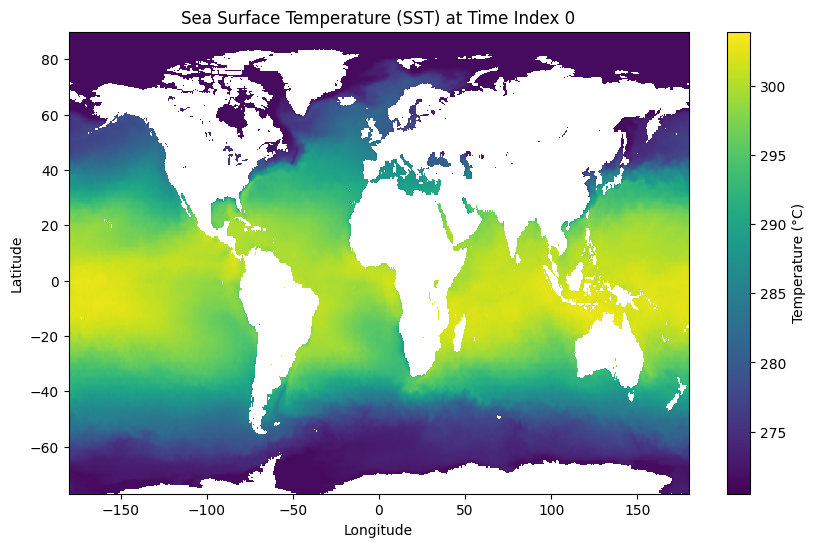

In [9]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# Define the file path for the SST (Sea Surface Temperature) file
file_path = 'project_SST_1992-2021.nc'

# Function to plot a heatmap of the temperature (SST) data
def plot_sst_heatmap(file_path):
    # Open the NetCDF file
    dataset = netCDF4.Dataset(file_path, 'r')

    # Check if the variable 'SST' exists in the dataset
    if 'SST' not in dataset.variables:
        print(f"'SST' variable not found in {file_path}")
        dataset.close()
        return

    # Read the SST data (assuming it has dimensions time, latitude, longitude)
    sst_data = dataset.variables['SST'][:]

    # Extract latitude and longitude coordinates (for axis labels)
    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]

    # We'll take a snapshot of SST data at a particular time step (e.g., the first time step)
    # Modify this if you'd like to visualize a different time step or a range of data.
    time_index = 0  # You can change this to visualize different time points
    sst_snapshot = sst_data[time_index, :, :]  # Extract data for the given time index

    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(longitudes, latitudes, sst_snapshot, shading='auto', cmap='viridis')
    plt.colorbar(label='Temperature (°C)')
    plt.title(f'Sea Surface Temperature (SST) at Time Index {time_index}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Close the dataset after processing
    dataset.close()

# Call the function to plot the heatmap
plot_sst_heatmap(file_path)


SSH Data Shape: (360, 545, 720)


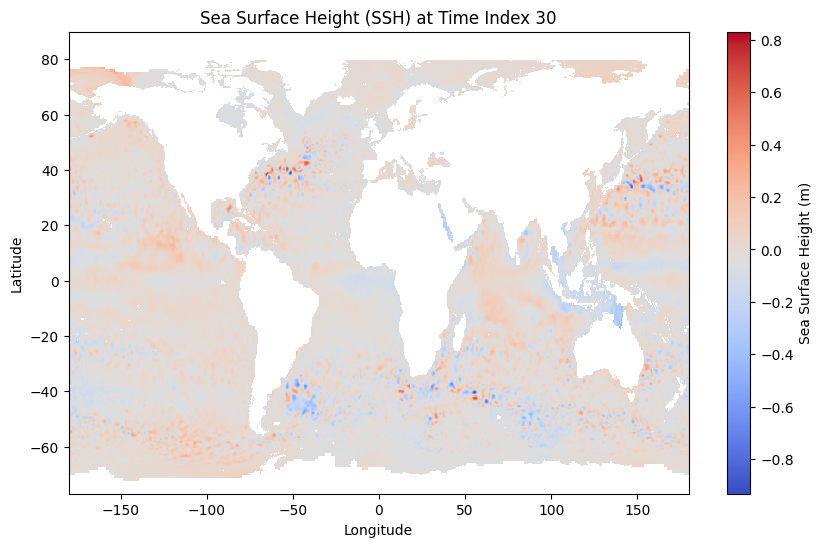

In [24]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

def plot_ssh_heatmap(file_path):
    # Open the NetCDF file
    dataset = netCDF4.Dataset(file_path, 'r')

    # Check for the SSH variable and ensure it's a 3D array (time x lat x lon)
    if 'SSH' not in dataset.variables:
        print(f"'SSH' variable not found in {file_path}")
        dataset.close()
        return

    # Read the SSH data
    ssh_data = dataset.variables['SSH'][:]

    # Mask invalid data based on the _FillValue
    fill_value = dataset.variables['SSH']._FillValue
    ssh_data = np.ma.masked_equal(ssh_data, fill_value)  # Mask the invalid data

    # Debug: Check the shape of the SSH data and dimensions
    print("SSH Data Shape:", ssh_data.shape)

    # Check the names of the latitude and longitude variables in the dataset
    try:
        latitudes = dataset.variables['lat'][:]  # Latitude data
        longitudes = dataset.variables['lon'][:]  # Longitude data
    except KeyError:
        print("Latitude or Longitude variables not found in the dataset.")
        dataset.close()
        return

    # Ensure that the data is a 3D array (time x latitude x longitude)
    if len(ssh_data.shape) != 3:
        print(f"SSH data is not 3D: {ssh_data.shape}")
        dataset.close()
        return

    # Snapshot for a specific time (e.g., time_index = 0)
    time_index = 30  # You can change this to another index if needed
    ssh_snapshot = ssh_data[time_index, :, :]  # Extract the data for the chosen time step

    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(longitudes, latitudes, ssh_snapshot, shading='auto', cmap='coolwarm')
    plt.colorbar(label='Sea Surface Height (m)')
    plt.title(f'Sea Surface Height (SSH) at Time Index {time_index}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Close the dataset
    dataset.close()

# Call the function with your file
plot_ssh_heatmap("project_SSH_1992-2021.nc")


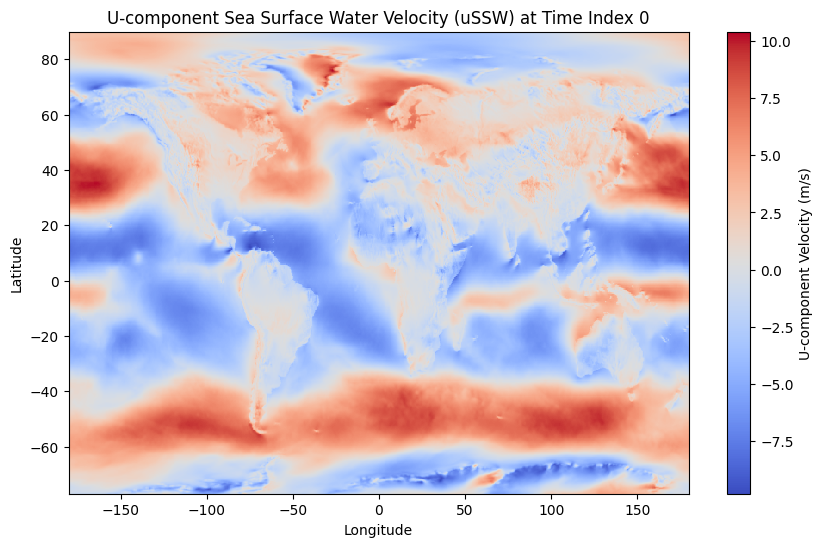

In [14]:
def plot_ussw_heatmap(file_path):
    dataset = netCDF4.Dataset(file_path, 'r')
    if 'uSSW' not in dataset.variables:
        print(f"'uSSW' variable not found in {file_path}")
        dataset.close()
        return

    ussw_data = dataset.variables['uSSW'][:]
    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]

    # Snapshot for a specific time (e.g., time_index = 0)
    time_index = 0
    ussw_snapshot = ussw_data[time_index, :, :]

    plt.figure(figsize=(10, 6))
    plt.pcolormesh(longitudes, latitudes, ussw_snapshot, shading='auto', cmap='coolwarm')
    plt.colorbar(label='U-component Velocity (m/s)')
    plt.title(f'U-component Sea Surface Water Velocity (uSSW) at Time Index {time_index}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    dataset.close()

plot_ussw_heatmap("project_uSSW_1992-2021.nc")


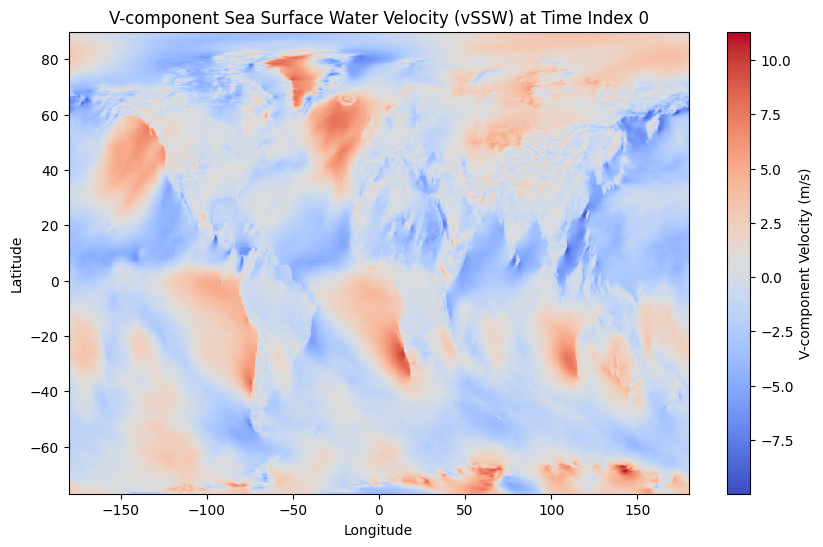

In [21]:
def plot_vssw_heatmap(file_path):
    dataset = netCDF4.Dataset(file_path, 'r')
    if 'vSSW' not in dataset.variables:
        print(f"'vSSW' variable not found in {file_path}")
        dataset.close()
        return

    vssw_data = dataset.variables['vSSW'][:]
    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]

    # Snapshot for a specific time (e.g., time_index = 0)
    time_index = 0
    vssw_snapshot = vssw_data[time_index, :, :]

    plt.figure(figsize=(10, 6))
    plt.pcolormesh(longitudes, latitudes, vssw_snapshot, shading='auto', cmap='coolwarm')
    plt.colorbar(label='V-component Velocity (m/s)')
    plt.title(f'V-component Sea Surface Water Velocity (vSSW) at Time Index {time_index}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    dataset.close()

plot_vssw_heatmap("project_vSSW_1992-2021.nc")
